# Introduction

hcrystalball is a time series forecasting library which tries to connect two traditionally disconnected worlds of forecasting - traditional econometric approaches and more recent machine learning approaches. It builds on a wonderfully simple Sklearn API, which is familiar to every practitioner in data science. It makes it very easy to try different algorithms such as Exponential Smoothing models and Gradient Boosting trees, robustly cross-validate them, combine them with rich sklearn functionality such as Transformers and Pipelines or put together very different models and construct powerful Ensembles. 

Currently, supported estimators are:

- All Regressors following SKlearn API
- [Prophet](https://facebook.github.io/prophet/docs/quick_start.html#python-api)
- [AutoARIMA/ARIMA](http://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.AutoARIMA.html#pmdarima.arima.AutoARIMA)
- [Smoothing models](https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html#statsmodels.tsa.holtwinters.ExponentialSmoothing) from statsmodels.tsa.holtwinters  
- [BATS/TBATS](https://github.com/intive-DataScience/tbats)
- hcrystalball native models - Simple Ensembles, Stacking Ensembles

## Quick Start

Following sklearn API all hcrystalball wrappers expect training data X and y for fit method and features in X for predict method. Despite hcrystalball following closely sklearn API, there are 2 biggest differences between sklearn API and hcrystalball API :

1) hcrystalball uses pandas as primary data interface - X should be pandas dataframe and y can be any 1-dimensional array (i.e. pandas Series)
    
2) Time-series predictions are principally different from traditional supervised machine learning because it's very scarce on features, it's common practice to use just the time series itself (in econometrics referred to as univariate predictions). Why is that? To leverage additional features we need to know its values also in the future. This fundamental difference between traditional supervised ML and time-series predictions is reflected in different requirements for input data. The minimal requirement for input data is pandas dataframe X with column 'date' in string data type and any 1D array-like values of y (the target/response/dependent variable) - this reflects the univariate prediction case mentioned above. Additional features (in econometrics referred to as exogenous variables) can be added to the X dataframe.

### Read Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [12, 6]

In [2]:
from hcrystalball.utils import get_sales_data

df = get_sales_data(n_dates=100, 
                    n_assortments=1, 
                    n_states=1, 
                    n_stores=1)
X, y = pd.DataFrame(index=df.index), df['Sales']

In [3]:
X.head(10)

""
Date
2015-04-23
2015-04-24
2015-04-25
2015-04-26
2015-04-27
2015-04-28
2015-04-29
2015-04-30
2015-05-01


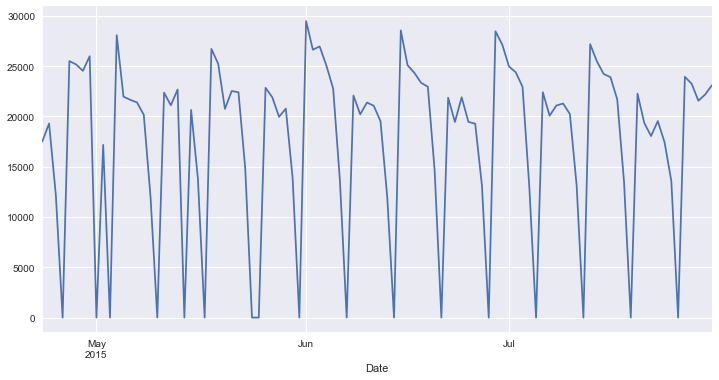

In [4]:
y.plot();

### First Forecast

Let's import popular Prophet.model and do some predictions

In [5]:
from hcrystalball.wrappers import ExponentialSmoothingWrapper

In [6]:
model = ExponentialSmoothingWrapper()
model.fit(X[:-10], y[:-10])
model.predict(X[-10:])

,ExponentialSmoothing
2015-07-22,17512.303075
2015-07-23,17512.303075
2015-07-24,17512.303075
2015-07-25,17512.303075
2015-07-26,17512.303075
2015-07-27,17512.303075
2015-07-28,17512.303075
2015-07-29,17512.303075
2015-07-30,17512.303075
2015-07-31,17512.303075


Horizon of the prediction (number of steps ahead we want to forecast) is based on the length of provided X when calling predict.

Name of the returned column with prediction is derived from the wrapper's name

### Model Name

In [ ]:
model = ProphetWrapper(name = 'my_prophet_model')
model.fit(X[:-10], y[:-10])
(model.predict(X[-10:])
      .merge(y, left_index=True, right_index=True, how='outer')
      .tail(50)
      .plot()
);

### Confidence Intervals

All models which support confidence intervals in predictions have also possibility to return them - they will be returned as {name of the wrapper}_lower / _upper

In [ ]:
model = ProphetWrapper(conf_int=True)
model.fit(X[:-10], y[:-10])
(model.predict(X[-10:])
      .merge(y, left_index=True, right_index=True, how='outer')
      .tail(30)
      .plot()
);

### Model Parameters

We also try to keep all the functionality of the original model, so any argument which can be passed to wrapped model (i.e.Prophet) can be passed even to the wrapper. All parameters are listed in the signiture of the wrapper, but hcrystalball documents only hcrystalball specific ones, so for model specific parametes please refer to original documentation of wrapper model

In [ ]:
ProphetWrapper?

To keep the compatibility with Sklearn as much as possible - all arguments should be passed to the wrapper during initialization. If the original model provided different ways how to add specific parameters (i.e fit method, Prophet add_regressor method...) the wrapper implements specific parameter (i.e. fit_params, extra_regressors) which can be used for passing these arguments during initialization.

inner model of the wrapper could be accessed with wrapper.model

### Accessing Wrapped Model

In [ ]:
model.model

You can use all other wrappers for traditional time series models following the same API:

- SarimaxWrapper with autosarima support
- BATSWrapper
- TBATSWrapper
- ExponentialSmoothingWrapper
- SimpleSmoothingWrapper
- HoltSmoothingWrapper